# 6.2 Exploring relationships (Sample data)

### This script contains the following:

#### 1. Importing Visualization Libraries and Data
#### 2. Data Cleaning
#### 3. Exploring Relationships
     Correlations
     Scatterplots
     Pair Plots
     Categorical Plots

### 1. Importing Visualization Libraries and Data

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib
import os
from sklearn import tree, preprocessing

In [2]:
# This option ensures the charts you create are displayed in the notebook without the need to "call" them specifically.

%matplotlib inline

In [3]:
# Define path

path = r'/Users/faridchehraz/Desktop/Python/Master - USA Wildfires'

In [4]:
#Import ords_prods_merged_analysis_cat pkl file
df = pd.read_pickle(os.path.join(path, '2. Data', 'b. Prepared Data', 'US_wildfires.pkl'))

In [5]:
df.head()

,FOD_ID,FIRE_YEAR,DISCOVERY_DATE,DISCOVERY_DOY,NWCG_GENERAL_CAUSE,FIRE_SIZE,FIRE_SIZE_CLASS,LATITUDE,LONGITUDE,OWNER_DESCR,STATE,COUNTY,FIPS_NAME,DISC_MONTH,DISC_DOW
0,1,2005,2005-02-02,33,Power generation/transmission/distribution,0.10,A,40.036944,-121.005833,USFS,CA,63,Plumas County,2,Wednesday
1,2,2004,2004-05-12,133,Natural,0.25,A,38.933056,-120.404444,USFS,CA,61,Placer County,5,Wednesday
2,3,2004,2004-05-31,152,Debris and open burning,0.10,A,38.984167,-120.735556,STATE OR PRIVATE,CA,17,El Dorado County,5,Monday
3,4,2004,2004-06-28,180,Natural,0.10,A,38.559167,-119.913333,USFS,CA,3,Alpine County,6,Monday
4,5,2004,2004-06-28,180,Natural,0.10,A,38.559167,-119.933056,USFS,CA,3,Alpine County,6,Monday


In [6]:
#If-statement with the loc() function to derive Fire_Size_Desc column
df.loc[df['FIRE_SIZE_CLASS'] == 'A', 'Fire_Size_Desc'] = '0.0 - 0.25 Acres'
df.loc[df['FIRE_SIZE_CLASS'] == 'B', 'Fire_Size_Desc'] = '0.26 - 9.9 Acres'
df.loc[df['FIRE_SIZE_CLASS'] == 'C', 'Fire_Size_Desc'] = '10.0 - 99.9 Acres'
df.loc[df['FIRE_SIZE_CLASS'] == 'D', 'Fire_Size_Desc'] = '100 - 299 Acres'
df.loc[df['FIRE_SIZE_CLASS'] == 'E', 'Fire_Size_Desc'] = '300 - 999 Acres'
df.loc[df['FIRE_SIZE_CLASS'] == 'F', 'Fire_Size_Desc'] = '1000 - 4999 Acres'
df.loc[df['FIRE_SIZE_CLASS'] == 'G', 'Fire_Size_Desc'] = '5000+ Acres'

• What are the main causes of wildfires? NWGC_GENERAL_CAUSE

• What percentage of wildfires are caused by humans? NWGC_GENERAL_CAUSE / Fire_Size_Desc

• When do wildfires happen? i.e., in which month and day of the week DISCOVERY_DOY / DISC_MONTH / DISC_DOW

• Have incidents been increasing or decreasing over time? FIRE_YEAR

• Where do fires occur? i.e., in which states and counties? COUNTY / FIPS_NAME / LATITUDE / LONGITUDE

• On which type of land do wildfires occur e.g., government owned etc. OWNER_DESCR / NWGC_GENERAL_CAUSE / Fire_Size_Desc

In [8]:
df.head()

,FOD_ID,FIRE_YEAR,DISCOVERY_DATE,DISCOVERY_DOY,NWCG_GENERAL_CAUSE,FIRE_SIZE,FIRE_SIZE_CLASS,LATITUDE,LONGITUDE,OWNER_DESCR,STATE,COUNTY,FIPS_NAME,DISC_MONTH,DISC_DOW,Fire_Size_Desc
0,1,2005,2005-02-02,33,Power generation/transmission/distribution,0.10,A,40.036944,-121.005833,USFS,CA,63,Plumas County,2,Wednesday,0.0 - 0.25 Acres
1,2,2004,2004-05-12,133,Natural,0.25,A,38.933056,-120.404444,USFS,CA,61,Placer County,5,Wednesday,0.0 - 0.25 Acres
2,3,2004,2004-05-31,152,Debris and open burning,0.10,A,38.984167,-120.735556,STATE OR PRIVATE,CA,17,El Dorado County,5,Monday,0.0 - 0.25 Acres
3,4,2004,2004-06-28,180,Natural,0.10,A,38.559167,-119.913333,USFS,CA,3,Alpine County,6,Monday,0.0 - 0.25 Acres
4,5,2004,2004-06-28,180,Natural,0.10,A,38.559167,-119.933056,USFS,CA,3,Alpine County,6,Monday,0.0 - 0.25 Acres


In [9]:
df['FIRE_SIZE_CLASS'].value_counts().sort_index(ascending=True)

A     810694
B    1047772
C     246247
D      32261
E      16227
F       9097
G       4455
Name: FIRE_SIZE_CLASS, dtype: int64

In [10]:
subset = df.apply(lambda row: row[df['FIRE_SIZE_CLASS'].isin(['C','D','E','F','G'])])

In [11]:
subset.shape

(308287, 16)

### 3. Exploring Relationships

### Correlations:

In [12]:
# Create a correlation matrix using pandas

subset.corr()

,FOD_ID,FIRE_YEAR,DISCOVERY_DOY,FIRE_SIZE,LATITUDE,LONGITUDE,DISC_MONTH
FOD_ID,1.000000,0.776739,-0.010836,0.015049,0.025922,-0.068695,-0.012150
FIRE_YEAR,0.776739,1.000000,-0.003924,0.021675,0.042096,-0.050347,-0.004265
DISCOVERY_DOY,-0.010836,-0.003924,1.000000,0.024945,0.158374,-0.229153,0.995646
FIRE_SIZE,0.015049,0.021675,0.024945,1.000000,0.113113,-0.128362,0.024870
LATITUDE,0.025922,0.042096,0.158374,0.113113,1.000000,-0.559177,0.159362
LONGITUDE,-0.068695,-0.050347,-0.229153,-0.128362,-0.559177,1.000000,-0.229441
DISC_MONTH,-0.012150,-0.004265,0.995646,0.024870,0.159362,-0.229441,1.000000


#### Create a correlation heatmap using seaborn:

In [13]:
subset.columns

Index(['FOD_ID', 'FIRE_YEAR', 'DISCOVERY_DATE', 'DISCOVERY_DOY',
       'NWCG_GENERAL_CAUSE', 'FIRE_SIZE', 'FIRE_SIZE_CLASS', 'LATITUDE',
       'LONGITUDE', 'OWNER_DESCR', 'STATE', 'COUNTY', 'FIPS_NAME',
       'DISC_MONTH', 'DISC_DOW', 'Fire_Size_Desc'],
      dtype='object')

In [14]:
# Create a subset excluding the "FOD_ID", "DISCOVERY_DATE", 'FIRE_SIZE_CLASS',
#'COUNTY', 'FIPS_NAME' columns

sub = subset[['FIRE_YEAR', 'DISCOVERY_DOY','NWCG_GENERAL_CAUSE', 'LATITUDE','LONGITUDE', 'OWNER_DESCR', 'STATE',
       'DISC_MONTH', 'DISC_DOW','FIRE_SIZE', 'Fire_Size_Desc']]

In [15]:
sub

,FIRE_YEAR,DISCOVERY_DOY,NWCG_GENERAL_CAUSE,LATITUDE,LONGITUDE,OWNER_DESCR,STATE,DISC_MONTH,DISC_DOW,FIRE_SIZE,Fire_Size_Desc
16,2004,280,Equipment and vehicle use,38.523333,-120.211667,USFS,CA,10,Wednesday,16823.0,5000+ Acres
17,2004,287,Power generation/transmission/distribution,38.780000,-120.260000,USFS,CA,10,Wednesday,7700.0,5000+ Acres
25,2004,202,Natural,33.315833,-105.512222,USFS,NM,7,Tuesday,10.0,10.0 - 99.9 Acres
37,2005,27,Arson/incendiarism,35.000278,-83.351111,USFS,NC,1,Thursday,50.3,10.0 - 99.9 Acres
39,2005,43,Debris and open burning,36.001667,-81.590000,MISSING/NOT SPECIFIED,NC,2,Saturday,125.0,100 - 299 Acres
...,...,...,...,...,...,...,...,...,...,...,...
2166748,2016,292,Missing data/not specified/undetermined,36.431667,-84.421667,PRIVATE,TN,10,Tuesday,125.0,100 - 299 Acres
2166749,2016,296,Missing data/not specified/undetermined,31.143611,-88.111944,PRIVATE,AL,10,Saturday,120.0,100 - 299 Acres
2166750,2017,92,Missing data/not specified/undetermined,33.920000,-85.310000,PRIVATE,AL,4,Sunday,120.0,100 - 299 Acres
2166751,2017,334,Missing data/not specified/undetermined,34.640000,-93.400000,USFS,AR,11,Thursday,110.0,100 - 299 Acres


In [16]:
#Convert quantitative variables to numerical values
le = preprocessing.LabelEncoder()
sub['NWCG_GENERAL_CAUSE'] = le.fit_transform(subset['NWCG_GENERAL_CAUSE'])
sub['STATE'] = le.fit_transform(subset['STATE'])
sub['DISC_DOW'] = le.fit_transform(subset['DISC_DOW'])
sub['Fire_Size_Desc'] = le.fit_transform(subset['Fire_Size_Desc'])
sub['OWNER_DESCR'] = le.fit_transform(subset['OWNER_DESCR'])
print(sub.head())

/var/folders/vh/d2rsnjw92ql_ggn35h8q4vmr0000gn/T/ipykernel_4384/2377065486.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sub['NWCG_GENERAL_CAUSE'] = le.fit_transform(subset['NWCG_GENERAL_CAUSE'])
/var/folders/vh/d2rsnjw92ql_ggn35h8q4vmr0000gn/T/ipykernel_4384/2377065486.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sub['STATE'] = le.fit_transform(subset['STATE'])
/var/folders/vh/d2rsnjw92ql_ggn35h8q4vmr0000gn/T/ipykernel_4384/2377065486.py:5: SettingWithCopyWarning: 
A value is trying to be set 

    FIRE_YEAR  DISCOVERY_DOY  NWCG_GENERAL_CAUSE   LATITUDE   LONGITUDE  \
16       2004            280                   2  38.523333 -120.211667   
17       2004            287                   9  38.780000 -120.260000   
25       2004            202                   7  33.315833 -105.512222   
37       2005             27                   0  35.000278  -83.351111   
39       2005             43                   1  36.001667  -81.590000   

    OWNER_DESCR  STATE  DISC_MONTH  DISC_DOW  FIRE_SIZE  Fire_Size_Desc  
16           15      4          10         6    16823.0               4  
17           15      4          10         6     7700.0               4  
25           15     31           7         5       10.0               0  
37           15     26           1         4       50.3               0  
39            6     26           2         2      125.0               1  


/var/folders/vh/d2rsnjw92ql_ggn35h8q4vmr0000gn/T/ipykernel_4384/2377065486.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sub['OWNER_DESCR'] = le.fit_transform(subset['OWNER_DESCR'])


In [17]:
sub

,FIRE_YEAR,DISCOVERY_DOY,NWCG_GENERAL_CAUSE,LATITUDE,LONGITUDE,OWNER_DESCR,STATE,DISC_MONTH,DISC_DOW,FIRE_SIZE,Fire_Size_Desc
16,2004,280,2,38.523333,-120.211667,15,4,10,6,16823.0,4
17,2004,287,9,38.780000,-120.260000,15,4,10,6,7700.0,4
25,2004,202,7,33.315833,-105.512222,15,31,7,5,10.0,0
37,2005,27,0,35.000278,-83.351111,15,26,1,4,50.3,0
39,2005,43,1,36.001667,-81.590000,6,26,2,2,125.0,1
...,...,...,...,...,...,...,...,...,...,...,...
2166748,2016,292,5,36.431667,-84.421667,10,42,10,5,125.0,1
2166749,2016,296,5,31.143611,-88.111944,10,1,10,2,120.0,1
2166750,2017,92,5,33.920000,-85.310000,10,1,4,3,120.0,1
2166751,2017,334,5,34.640000,-93.400000,15,2,11,4,110.0,1


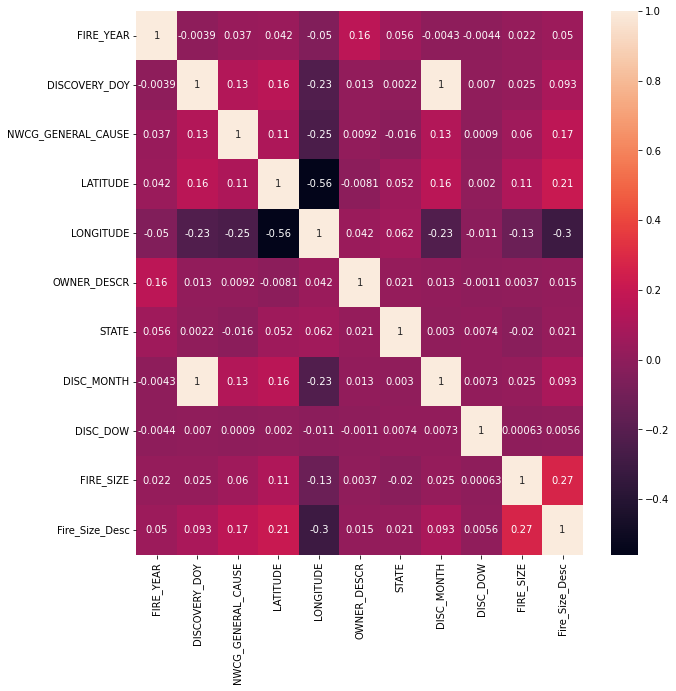

In [18]:
# Create a subplot with matplotlib
f,ax = plt.subplots(figsize=(10,10))

# Create the correlation heatmap in seaborn by applying a heatmap onto the correlation matrix and the subplots defined above.
corr = sns.heatmap(sub.corr(), annot = True, ax = ax) # The `annot` argument allows the plot to 
#place the correlation coefficients onto the heatmap.

#### Correlation Observations:

   - There are no clear strong correlations between variables
   - There more prominent correlations although weak are between:
     - Longitude & Discovery day of year / Month
     - Longitude & Cause of fire
     - Longitude & Fire size description
     - Latitude & Fire size description

In [19]:
df['FIRE_SIZE_CLASS'].value_counts().sort_index(ascending=True)

A     810694
B    1047772
C     246247
D      32261
E      16227
F       9097
G       4455
Name: FIRE_SIZE_CLASS, dtype: int64

In [20]:
sub['Fire_Size_Desc'].value_counts().sort_index(ascending=True)

0    246247
1     32261
2      9097
3     16227
4      4455
Name: Fire_Size_Desc, dtype: int64

### Scatterplots:

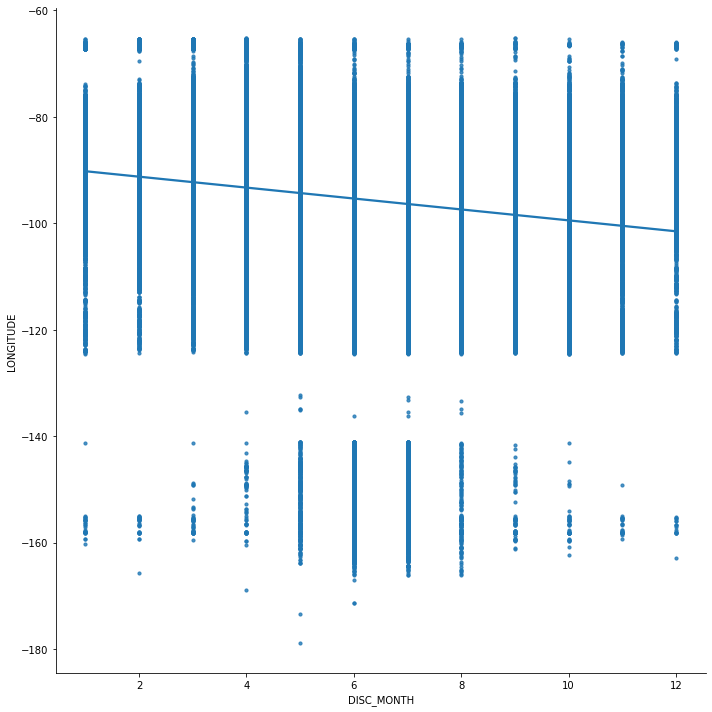

In [21]:
# Create a scatterplot for the "LONGITUDE" and "FIRE_SIZE_DESC" columns in seaborn

sns.lmplot(x = 'DISC_MONTH', y = 'LONGITUDE', data = sub, height = 10, aspect = 1, scatter_kws={"s": 10})

The scatter plot shows a weak correlation between "DISC_MONTH" and "LONGITUDE".

### Pair Plots:

In [22]:
# Keep only the variables you want to use in the pair plot

sub_2 = sub[['DISCOVERY_DOY','NWCG_GENERAL_CAUSE', 'STATE',
       'DISC_MONTH', 'DISC_DOW', 'Fire_Size_Desc']]

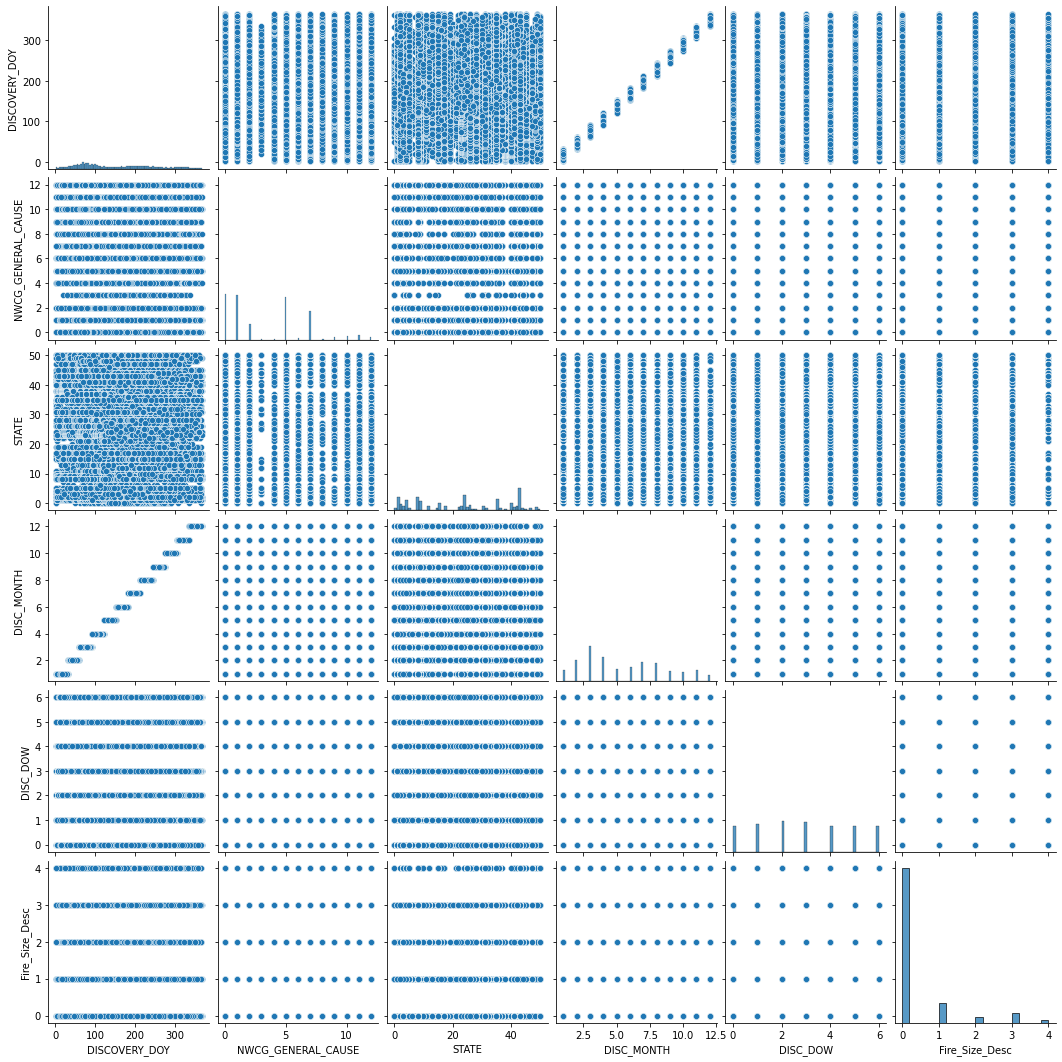

In [23]:
# Create a pair plot 

g = sns.pairplot(sub_2)
plt.rcParams['figure.figsize']=(10,10)

Not much to comment on, perhaps with a smaller subset of data some correlations will become more visible

### Categorical Plots:

##### Creating a categorical plot looking at Month, Cause and Fire Size

([<matplotlib.axis.XTick at 0x7fb5a66f5a00>,
 [Text(0.0, 0, '0'),
  Text(2.0, 0, '2'),
  Text(4.0, 0, '4'),
  Text(6.0, 0, '6'),
  Text(8.0, 0, '8'),
  Text(10.0, 0, '10'),
  Text(12.0, 0, '12'),
  Text(14.0, 0, '14'),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

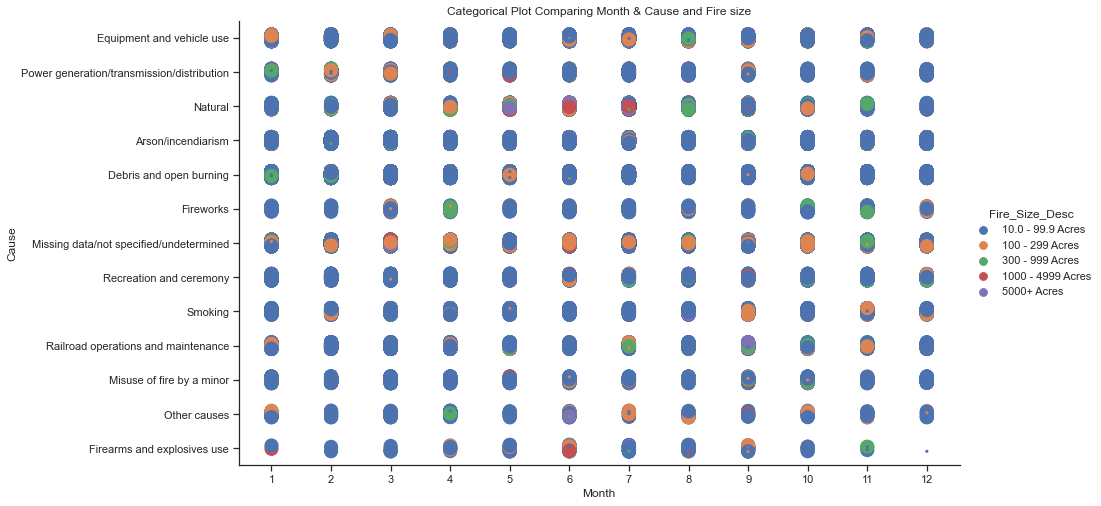

In [61]:
sns.set(style='ticks')
cat_plot = sns.catplot(x = 'DISC_MONTH', y = 'NWCG_GENERAL_CAUSE', hue = 'Fire_Size_Desc', data = subset, hue_order = ['10.0 - 99.9 Acres','100 - 299 Acres','300 - 999 Acres','1000 - 4999 Acres','5000+ Acres'],height=7, aspect=2, sizes=(10, 200))

plt.title('Categorical Plot Comparing Month & Cause and Fire size')
plt.xlabel('Month')
plt.ylabel('Cause')
plt.xticks([1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12])


Even though the data used for the above graph is a subset of the original data set, the number of data points has made it difficult to read.
Intersting to see the number of large fires (between 1,000 - 4,999 acres) in June and July

##### Creating a categorical plot looking at Month, State and Fire Size

([<matplotlib.axis.XTick at 0x7fb638bf7760>,
 [Text(0.0, 0, '0'),
  Text(2.0, 0, '2'),
  Text(4.0, 0, '4'),
  Text(6.0, 0, '6'),
  Text(8.0, 0, '8'),
  Text(10.0, 0, '10'),
  Text(12.0, 0, '12'),
  Text(14.0, 0, '14'),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

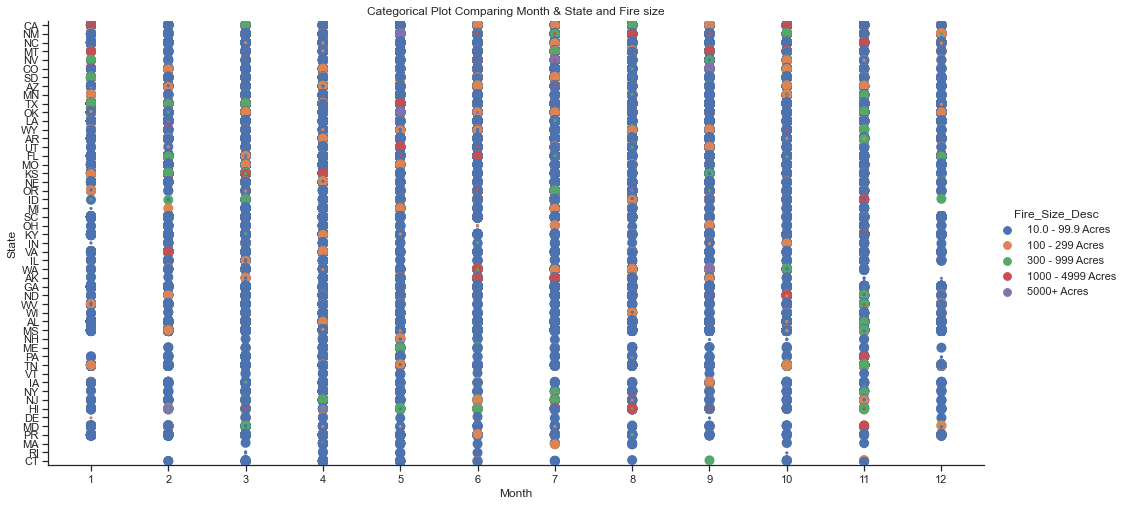

In [67]:
sns.set(style='ticks')
cat_plot = sns.catplot(x = 'DISC_MONTH', y = 'STATE', hue = 'Fire_Size_Desc', data = subset, hue_order = ['10.0 - 99.9 Acres','100 - 299 Acres','300 - 999 Acres','1000 - 4999 Acres','5000+ Acres'],height=7, aspect=2, sizes=(10, 100))

plt.title('Categorical Plot Comparing Month & State and Fire size')
plt.xlabel('Month')
plt.ylabel('State')
plt.xticks([1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12])

As above, the number of data points has made it difficult to read the graph.
Interesting to see in most months there large (1000 to 4999 acres) fires across a number of states

##### Questions

I have not been able to answer the below quesions with the graphs in the 2 notebooks. I think I will be able to do so by running simple graphs e.g. histograms.

• What are the main causes of wildfires? NWGC_GENERAL_CAUSE

• What percentage of wildfires are caused by humans? NWGC_GENERAL_CAUSE / Fire_Size_Desc

• When do wildfires happen? i.e., in which month and day of the week DISCOVERY_DOY / DISC_MONTH / DISC_DOW

• Have incidents been increasing or decreasing over time? FIRE_YEAR

• Where do fires occur? i.e., in which states and counties? COUNTY / FIPS_NAME / LATITUDE / LONGITUDE

• On which type of land do wildfires occur e.g., government owned etc. OWNER_DESCR / NWGC_GENERAL_CAUSE / Fire_Size_Desc

##### Hypotheses
- The frequency and geographical range of wildfires have increased over time.
- Due to higher temperature climates, southern states have a higher risk of wildfires.
